# Bagging (4) - Wine 데이터셋 분류

이탈리아에서 생산되는 와인 3가지 종류의 성분 조사 데이터 셋

> 출처 : sklearn 예제 데이터셋

## #01. 패키지 참조

> 진행되는 코드에 맞춰 필요한 패키지를 참조하세요.

In [31]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import read_excel, DataFrame, melt
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## #02. 데이터 가져오기

> https://data.hossam.kr/G02/wine.xlsx

In [5]:
origin = pd.read_excel('https://data.hossam.kr/G02/wine.xlsx')
origin.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


## #03. 데이터 전처리

### 1. 독립/종속 변수 분리

> 독립변수의 이름은 `class`입니다.

In [6]:
x = origin.drop('class',axis=1)
y= origin[['class']]

x.shape, y.shape

((178, 13), (178, 1))

### 2. 독립변수에 대한 데이터 표준화

> StandardScaler 사용

In [8]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### 3. 훈련 데이터와 검증 데이터 분리

In [9]:
x_train,x_test,y_train,y_test=  train_test_split(scaled_x,y,test_size=0.3,random_state=311)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124, 1), (54, 1))

## #04. 분류 모델중에서 가장 적합한 알고리즘 찾기

> singleML 함수를 사용하여 가장 적합한 알고리즘을 선별합니다.

### 1. 알고리즘 수행 함수 정의 (singleML)

In [10]:
def singleML(modelName, train_x, train_y, test_x, test_y, cv=5, **kargs):
    # 모델 구축
    model = modelName( **kargs)
    # 학습
    model.fit(train_x, train_y)
    # 훈련 점수
    train_scores = cross_val_score(model, train_x, train_y, cv=cv).mean()
    # 각 훈련 회차별 점수표
    score_df = pd.DataFrame(cross_validate(model, train_x, train_y, cv=5))
    # 검증 데이터에 대한 예측치 생성
    y_pred = model.predict(test_x)
    # 예측치에 대한 정확도 점수
    test_scores = accuracy_score(test_y, y_pred)
    # 리턴
    return [model, train_scores, test_scores, score_df]

### 2. 적합한 알고리즘 찾기

> 테스트할 알고리즘 리스트를 정의한 후 각 알고리즘의 스코어를 데이터프레임으로 생성합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
ml_list = [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier,SVC]
ml_list


[sklearn.linear_model._logistic.LogisticRegression,
 sklearn.neighbors._classification.KNeighborsClassifier,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.svm._classes.SVC]

In [38]:
scores = []
# 서포트백터머신(SVC)의 경우 독립변수에 이름이 없으면 경고가 표시된다.
# 그래서 이름을 붙여준다. --> 데이터프레임으로 구성
x_train_df = pd.DataFrame(x_train, columns=x.columns)
x_test_df = pd.DataFrame(x_test, columns=x.columns)
for ml in ml_list:
    _, train_score, test_score, _ = singleML(
    modelName = BaggingClassifier,
    train_x = x_train,
    train_y = y_train,
    test_x = x_test,
    test_y = y_test,
    base_estimator=ml(),
    n_estimators=50,
    #max_samples=1, # KNN, SVM과 충돌
    bootstrap=True,
    random_state=777,
    bootstrap_features=False,
    n_jobs=-1)
    scores.append({
    "name": ml.__name__, "train_score": train_score,
    "test_score": test_score})
df = pd.DataFrame(scores)
df


,name,train_score,test_score
0,LogisticRegression,0.984,0.944444
1,KNeighborsClassifier,0.976,0.888889
2,DecisionTreeClassifier,0.960,0.888889
3,SVC,0.984,0.981481


### 3. 결과표의 재배치 및 알고리즘 별 성능 비교 시각화

In [41]:
df2 = pd.melt(df, id_vars=['name'], value_vars=['train_score', 'test_score'],
var_name='type', value_name='score')
df2

,name,type,score
0,LogisticRegression,train_score,0.984000
1,KNeighborsClassifier,train_score,0.976000
2,DecisionTreeClassifier,train_score,0.960000
3,SVC,train_score,0.984000
4,LogisticRegression,test_score,0.944444
5,KNeighborsClassifier,test_score,0.888889
6,DecisionTreeClassifier,test_score,0.888889
7,SVC,test_score,0.981481


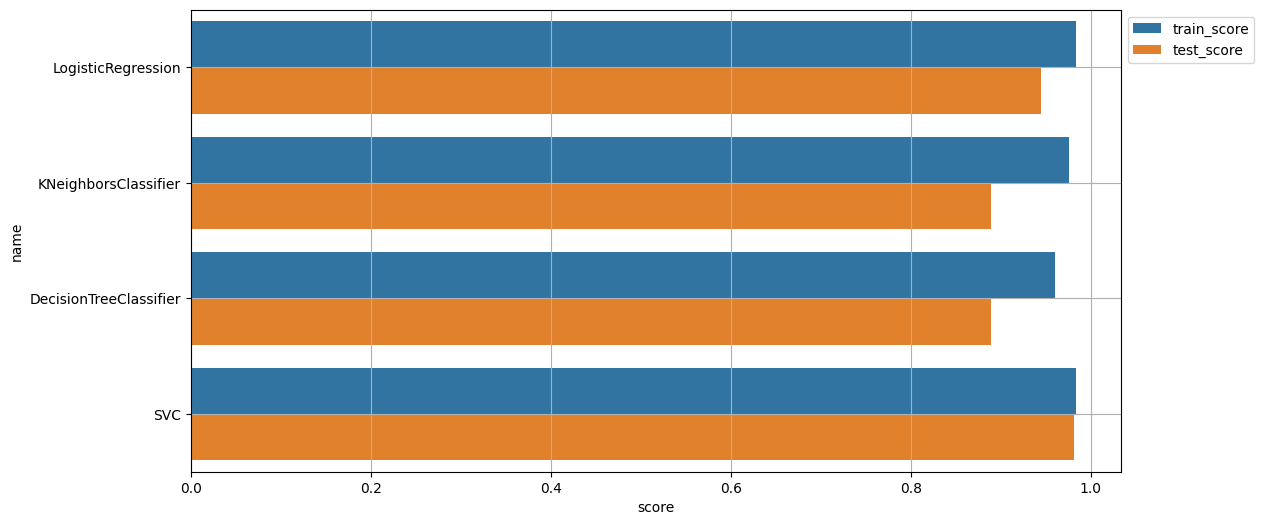

In [40]:
plt.figure(figsize=(12, 6))
sb.barplot(y='name', x='score', hue='type', data=df2)
plt.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()
plt.close()

## #05. 선정된 알고리즘을 기반으로 Bagging에 대한 최적 파라미터 찾기

### 1. Bagging 모델 구현

In [42]:
clf = BaggingClassifier(
base_estimator=SVC(),
random_state=777,
n_jobs=-1)
params = {
"bootstrap_features" : [True, False],
"bootstrap": [True, False],
"n_estimators": [10, 30, 50]
}
grid = GridSearchCV(clf, param_grid=params, cv=5)
grid.fit(x_train, y_train)
print(grid.best_params_)
result_df = pd.DataFrame(grid.cv_results_['params'])
result_df['mean_test_score'] = grid.cv_results_['mean_test_score']
result_df.sort_values(by='mean_test_score', ascending=False)

{'bootstrap': True, 'bootstrap_features': True, 'n_estimators': 30}


,bootstrap,bootstrap_features,n_estimators,mean_test_score
1,True,True,30,0.992
2,True,True,50,0.992
8,False,True,50,0.992
3,True,False,10,0.984
4,True,False,30,0.984
5,True,False,50,0.984
7,False,True,30,0.984
9,False,False,10,0.984
10,False,False,30,0.984
11,False,False,50,0.984


### 2. 정확도 확인

In [43]:
grid.best_score_


0.992

### 3. 최적의 파라미터를 갖는 객체를 활용하여 예측결과 생성후 정확도 확인

In [44]:
best = grid.best_estimator_
y_pred = best.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'GridSearchCV 분류기 정확도: {score:.4f}')

GridSearchCV 분류기 정확도: 0.9630
